1.Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2.Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3.Как распределяется бюджет на разные группы (department) с течением времени?
4.Какое количество людей в каждом департаменте?
5.Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к)
6.На базе линейной регрессии постройте прогноз по тому, какие будут закупки в следующий год по каждому департаменту

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import calendar
import datetime as dt


In [2]:
#отображение формата сумм
pd.options.display.float_format ='{:,.2f}'.format

In [3]:
df = pd.read_csv('C:/Users/ILYA/Desktop/Python/Final project/final_file.csv')

In [4]:
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,department
0,2,GARY JIMENEZ,captain iii (police department),"155,966.02","245,131.88","137,811.38",nan,"538,909.28","538,909.28",2011,police
1,3,ALBERT PARDINI,captain iii (police department),"212,739.13","106,088.18","16,452.60",nan,"335,279.91","335,279.91",2011,police
2,5,PATRICK GARDNER,"deputy chief of department,(fire department)","134,401.60","9,737.00","182,234.59",nan,"326,373.19","326,373.19",2011,fire
3,7,ALSON LEE,"battalion chief, (fire department)","92,492.01","89,062.90","134,426.14",nan,"315,981.05","315,981.05",2011,fire
4,9,MICHAEL MORRIS,"battalion chief, (fire department)","176,932.64","86,362.68","40,132.23",nan,"303,427.55","303,427.55",2011,fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15767 entries, 0 to 15766
Data columns (total 11 columns):
Id                  15767 non-null int64
EmployeeName        15767 non-null object
JobTitle            15767 non-null object
BasePay             15722 non-null float64
OvertimePay         15767 non-null float64
OtherPay            15767 non-null float64
Benefits            11365 non-null float64
TotalPay            15767 non-null float64
TotalPayBenefits    15767 non-null float64
Year                15767 non-null int64
department          15767 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [90]:
#ответ на вопрос 1:
# Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? 
#(максимальная, медианная, средняя)

In [6]:
df.groupby(['department', 'Year']).BasePay.agg(['max', 'mean', 'median'])

max       mean     median
department Year                                 
fire       2011 285,262.00 106,549.27 105,934.67
           2012 296,943.01 109,222.65 110,847.10
           2013 313,686.01 116,159.28 116,956.71
           2014 302,068.00 108,179.29 112,703.72
medicine   2011 257,510.59  57,342.25  53,822.61
           2012 254,878.82  53,843.10  56,968.71
           2013 271,831.50  55,630.66  59,834.00
           2014 268,946.02  56,816.50  60,364.97
police     2011 261,717.60 105,981.21 111,976.14
           2012 302,578.00  96,229.01 111,549.69
           2013 319,275.01 102,405.84 118,618.94
           2014 307,450.04  93,872.06 112,164.03

In [ ]:
##Ответ на вопрос 2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами?
##Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам


In [85]:
## Вариант 1. Построить 3 диаграмммы в каждой будут все департаменты, но различный стобец BasePay, OvertimePay, Benefits

In [7]:
a = df.groupby(['department', 'Year']).BasePay.sum().unstack()
b = df.groupby(['department', 'Year']).OvertimePay.sum().unstack()
c = df.groupby(['department', 'Year']).Benefits.sum().unstack()

In [8]:
a

Year,2011,2012,2013,2014
department,,,,
fire,"155,455,383.78","158,263,615.25","167,153,208.63","163,458,903.42"
medicine,"24,714,507.64","21,160,338.69","23,643,032.57","24,885,626.79"
police,"266,224,811.51","184,663,462.87","188,938,768.37","178,450,786.62"


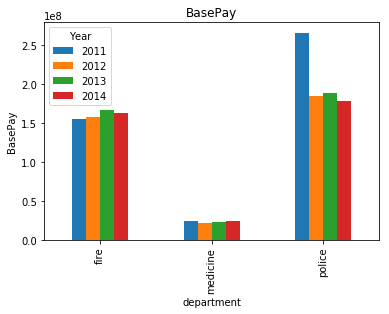

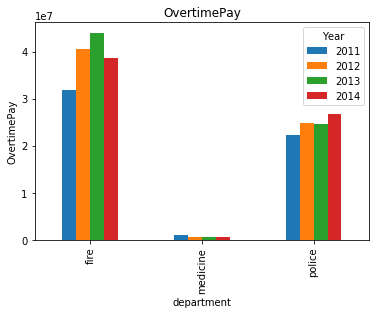

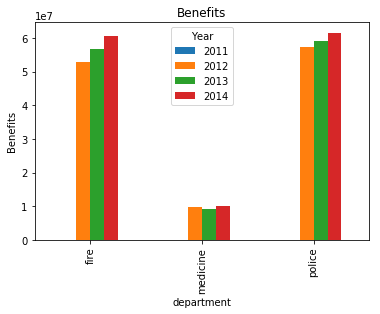

In [9]:
a.plot(kind='bar')
plt.xlabel('department')
plt.ylabel('BasePay')
plt.title('BasePay')


b.plot(kind='bar')
plt.xlabel('department')
plt.ylabel('OvertimePay')
plt.title('OvertimePay')


c.plot(kind='bar')
plt.xlabel('department')
plt.ylabel('Benefits')
plt.title('Benefits')
plt.show()




In [10]:
## Вариант 2. Объединить в один график весь запрос

In [10]:
b = df.groupby(['department', 'Year'])['BasePay', 'OvertimePay','Benefits'].sum()
b

BasePay   OvertimePay      Benefits
department Year                                           
fire       2011 155,455,383.78 31,898,485.78          0.00
           2012 158,263,615.25 40,499,542.12 52,859,030.29
           2013 167,153,208.63 43,978,891.99 56,620,946.76
           2014 163,458,903.42 38,625,129.76 60,707,949.89
medicine   2011  24,714,507.64  1,135,499.38          0.00
           2012  21,160,338.69    516,335.45  9,703,275.84
           2013  23,643,032.57    520,985.76  9,108,516.82
           2014  24,885,626.79    544,616.97 10,195,686.16
police     2011 266,224,811.51 22,225,776.17          0.00
           2012 184,663,462.87 24,739,129.82 57,429,170.22
           2013 188,938,768.37 24,573,767.45 59,201,909.16
           2014 178,450,786.62 26,684,074.32 61,511,276.28

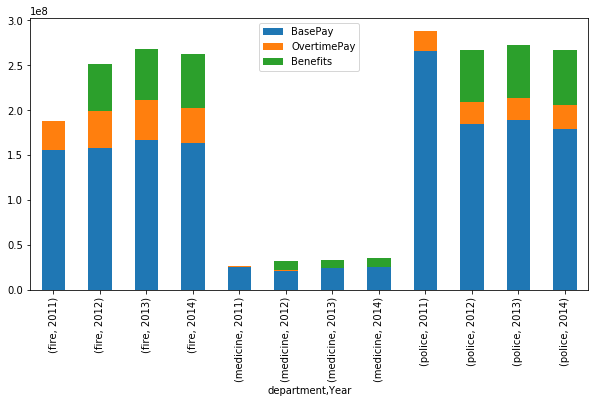

In [11]:
b.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

In [13]:
#Вариант 3 посроение диаграмм по каждому департаменту отдельно

In [13]:
df_p = df[df['department'] == 'police']
df_m = df[df['department'] == 'medicine']
df_f = df[df['department'] == 'fire']
f_p = df_p.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()
f_m = df_m.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()
f_f = df_f.groupby('Year')['BasePay', 'OvertimePay','Benefits'].sum()

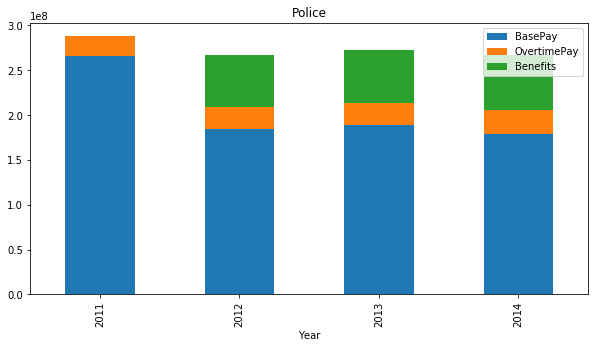

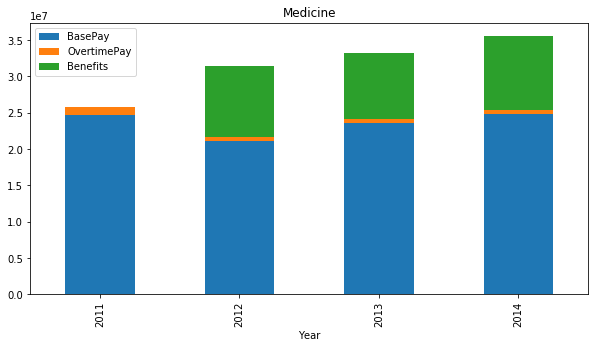

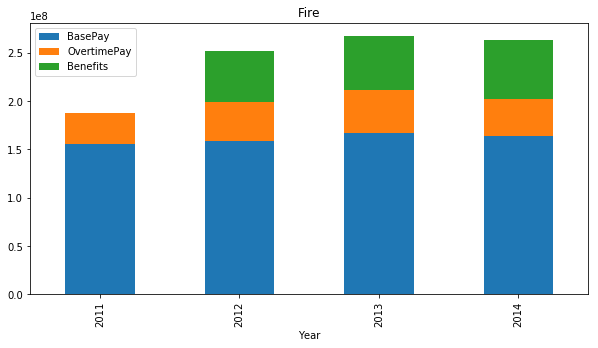

In [14]:
f_p.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Police')


f_m.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Medicine')


f_f.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Fire')
plt.show()


In [15]:
#Ответ на вопрос 3. Как распределяется бюджет на разные группы (department) с течением времени?
df.groupby(['department', 'Year']).TotalPay.sum().unstack()

Year,2011,2012,2013,2014
department,,,,
fire,"211,563,265.94","220,951,340.92","234,417,416.73","224,828,867.39"
medicine,"26,921,486.59","22,129,406.34","24,673,510.08","25,937,858.19"
police,"319,268,095.21","223,101,452.92","229,526,362.43","220,500,252.80"


In [16]:
##Ответ на вопрос 4.Какое количество людей в каждом департаменте?

df.groupby(['department']).EmployeeName.count()

department
fire        5879
medicine    1687
police      8201
Name: EmployeeName, dtype: int64

In [ ]:
###Ответ на вопрос 5.Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к)

In [17]:
#Определим количество групп с шагом 5к
df['TotalPay'].max() / 5000

107.781856

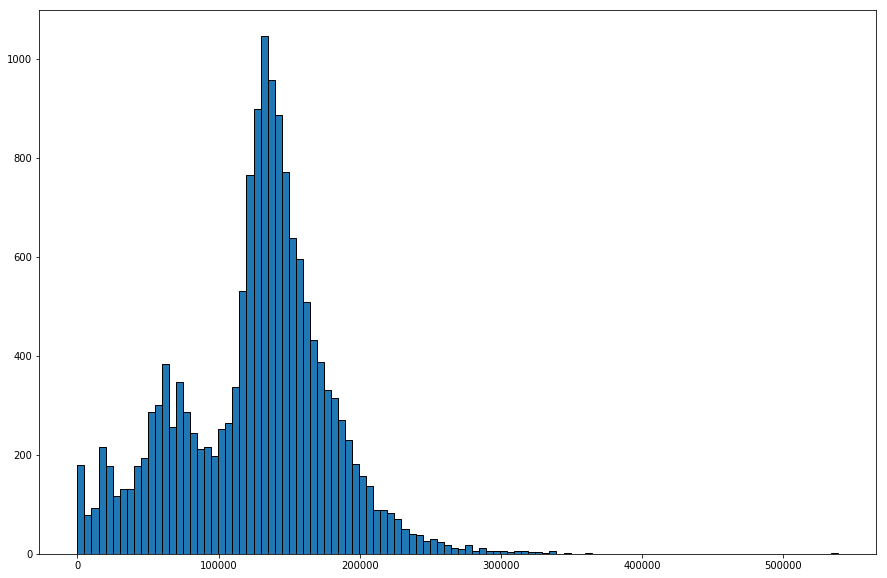

In [19]:
#построим гистограмму
from pylab import rcParams
hist_info = plt.hist(df['TotalPay'], bins=108, edgecolor='black')
rcParams['figure.figsize'] = 15,10

plt.show()

In [20]:
##6.На базе линейной регрессии постройте прогноз по тому, какие будут закупки в следующий год по каждому департаменту

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,department
0,2,GARY JIMENEZ,captain iii (police department),"155,966.02","245,131.88","137,811.38",nan,"538,909.28","538,909.28",2011,police
1,3,ALBERT PARDINI,captain iii (police department),"212,739.13","106,088.18","16,452.60",nan,"335,279.91","335,279.91",2011,police
2,5,PATRICK GARDNER,"deputy chief of department,(fire department)","134,401.60","9,737.00","182,234.59",nan,"326,373.19","326,373.19",2011,fire
3,7,ALSON LEE,"battalion chief, (fire department)","92,492.01","89,062.90","134,426.14",nan,"315,981.05","315,981.05",2011,fire
4,9,MICHAEL MORRIS,"battalion chief, (fire department)","176,932.64","86,362.68","40,132.23",nan,"303,427.55","303,427.55",2011,fire


In [284]:
#сначала по департаменту police
police_df = df[df['department'] == 'police']
police_df_copy =police_df[['Year' ,'BasePay', 'OvertimePay', 'OtherPay','Benefits','TotalPay', 'TotalPayBenefits']]
police_df_copy.head()


,Year,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,2011,"155,966.02","245,131.88","137,811.38",nan,"538,909.28","538,909.28"
1,2011,"212,739.13","106,088.18","16,452.60",nan,"335,279.91","335,279.91"
7,2011,"99,722.00","87,082.62","110,804.30",nan,"297,608.92","297,608.92"
9,2011,"198,778.01","73,478.20","13,957.65",nan,"286,213.86","286,213.86"
18,2011,"256,470.41",0.00,"11,522.18",nan,"267,992.59","267,992.59"


In [294]:
z = police_df_copy.groupby(['Year']).TotalPayBenefits.sum().reset_index()
z

,Year,TotalPayBenefits
0,2011,"319,268,095.21"
1,2012,"280,530,623.14"
2,2013,"288,728,271.59"
3,2014,"282,011,529.08"


In [295]:
z_TotalPay = police_df_copy.groupby(['Year']).TotalPay.sum().reset_index()
z_BasePay = police_df_copy.groupby(['Year']).BasePay.sum().reset_index()
z_OvertimePay = police_df_copy.groupby(['Year']).OvertimePay.sum().reset_index()
z_OtherPay = police_df_copy.groupby(['Year']).OtherPay.sum().reset_index()
z_Benefits = police_df_copy.groupby(['Year']).Benefits.sum().reset_index()


In [296]:
z['TotalPay'] = z_TotalPay['TotalPay'] 
z['BasePay'] = z_BasePay['BasePay'] 
z['OvertimePay'] = z_OvertimePay['OvertimePay'] 
z['OtherPay'] = z_OtherPay['OtherPay'] 
z['Benefits'] = z_Benefits['Benefits'] 
z

,Year,TotalPayBenefits,TotalPay,BasePay,OvertimePay,OtherPay,Benefits
0,2011,"319,268,095.21","319,268,095.21","266,224,811.51","22,225,776.17","30,817,507.53",0.00
1,2012,"280,530,623.14","223,101,452.92","184,663,462.87","24,739,129.82","13,698,860.23","57,429,170.22"
2,2013,"288,728,271.59","229,526,362.43","188,938,768.37","24,573,767.45","16,013,826.61","59,201,909.16"
3,2014,"282,011,529.08","220,500,252.80","178,450,786.62","26,684,074.32","15,365,391.86","61,511,276.28"


In [299]:
X_train, X_test, y_train, y_test = train_test_split(z.drop('TotalPayBenefits',axis=1), z['TotalPayBenefits'], test_size=0.25, random_state=78)

In [300]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
print(mean_squared_error(y_test, pred))

1.4753914816719828e+16


In [301]:
y_test

0   319,268,095.21
Name: TotalPayBenefits, dtype: float64

In [302]:
pred

array([1.97802401e+08])

In [194]:
#z['Year'] = pd.to_datetime(z['Year'], format = '%Y')
#z


In [193]:
#z['Year'] = z['Year'].dt.year
#z

In [192]:
#добавляю столбец високосного года
#z['leap year'] = z['Year'].apply(lambda e: 1 if calendar.isleap(e) else 0)
#z

In [191]:
#z.set_index('Year', inplace=True)
#z.sort_index(inplace=True)
#print('Монотонность - ',z.index.is_monotonic)

In [190]:
#z.TotalPay.plot()

In [195]:
#z.rolling(2).mean()

In [180]:
#def make_features(data, max_lag, rolling_mean_size):
#    data['year'] = data.index
   
    
    
#    for lag in range(1, max_lag + 1):
#        data['lag_{}'.format(lag)] = data['TotalPay'].shift(lag)

#    data['TotalPay'] = data['TotalPay'].shift().rolling(rolling_mean_size).mean().copy()

In [181]:
#make_features(z, 1, 2)

In [ ]:
#z

In [183]:
#z.dropna(inplace=True)